# Class5: 卷积神经网络
## Prerequisites
- Setup virtul environment
- `python3.6.9` + `TensorFlow2.3.0` + `sklearn` + `pandas` + `matplotlib`



## 5.0 回顾
- **全连接NN**:
  - 每个神经元与前后相邻层的每一个神经元都有连接关系, 输入是特征, 输出为预测的结果.
  - 参数个数:
    - ∑各层(前层神经元 x 后层神经元 + 后层神经元)

## 5.1 卷积计算过程
- 卷积Convolutional
  - 一种有效提取图像特征的方法
  - 一个正方形的卷积核
  - 指定步长滑动
  - 每一个步长, 卷积核会与输入特征图出现重合区域, 重合区域对应元素相乘与求和,最后加上偏置项, 得到输出特征的一个像素点
  - 遍历输入特征图中的每个像素点
  - 输入特征图的深度(channel数), 决定了当前层卷积核的深度
  - 当前层卷积核的个数，决定了当前层输出特征图的深度

## 5.2 感受野Receptive Field
- 卷积神经网络各输出特征图中的每个像素点，在原始输入图片上映射区域的大小

## 5.3 全零填充padding
- TF描述全零填充 
  - 全零填充时, 参数为`padding = ‘SAME’`, 此时的输出特征图片边长=输入特征图片边长/步长
  - 不全零填充时, 参数设置为`padding = ‘VALID’`, 此时的输出特征图片边长=输入特征图片边长-卷积核核长+1/步长
  - 输出特征图边长向上取整

## 5.4 TF描述卷积计算层函数

```
Ttf.keras.layers.Conv2D(
filters = 卷积核个数,
kernel_size = 卷积核尺寸, #正方形写核长整数，或(核高h，核宽w)
strides = 滑动步长, #横纵向相同写步长整数，或(纵向步长h，横向步长w)，默认1 
padding = “same” or “valid”, #使用全零填充是“same”，不使用是“valid”(默认) activation = “ relu ” or “ sigmoid ” or “ tanh ” or “ softmax”等 , #如有BN此处不写 
input_shape = (高, 宽 , 通道数) #输入特征图维度，可省略
)
```




## 5.5 批标准化(Batch Normalization, BN)
- 标准化
  - 使数据符合0均值，1为标准差的分布。 
- 批标准化
  - 对一小批数据(batch)，做标准化处理。
- 为每个卷积核**引入可训练参数𝜸和𝜷**，调整**批归一化**的力度。
- BN层位于***卷积层之后，激活层之前***
- TF描述批标准化函数
  ```
  tf.keras.layers.BatchNormalization()
  ```



## 5.6 池化Pooling
- 用于减少特征数据量
- **最大值池化**可提取图片纹理
- **均值池化**可保留背景特征
- TF描述最大化池化函数
  ```
  tf.keras.layers.MaxPool2D( 
  pool_size=池化核尺寸，#正方形写核长整数，或(核高h，核宽w) 
  strides=池化步长，#步长整数， 或(纵向步长h，横向步长w)，默认为pool_size 
  padding=‘valid’or‘same’ #使用全零填充是“same”，不使用是“valid”(默认) 
  )
  ```
- TF描述均值池化函数
  ```
  tf.keras.layers.AveragePooling2D( 
  pool_size=池化核尺寸，#正方形写核长整数，或(核高h，核宽w) 
  strides=池化步长，#步长整数， 或(纵向步长h，横向步长w)，默认为pool_size 
  padding=‘valid’or‘same’ #使用全零填充是“same”，不使用是“valid”(默认) 
  )
  ```




## 5.7 舍弃Dropout
- 在神经网络训练时，将一部分神经元按照**一定概率**从神经网络中***暂时***舍弃(～休眠)。神经网络使用时，被舍弃的神经元恢复链接
- TF描述池化函数
  ```
  tf.keras.layers.Dropout(舍弃的概率)
  ```

## 5.8 卷积神经网络
- 卷积核提取特征
- 送入全连接网络
- 卷积神经网络网络的主要模块
  - **C**onvolutional卷积
  - **B**N批标准化
  - **A**ctivation激活
  - **P**ooling池化
  - **D**ropout舍弃
- **卷积是什么?**
  - 卷积就是***特征提取器***，就是***CBAPD***


## 5.9 Cifar10数据集
- 彩色图片
- 由**6万**张(**32x32**) 像素点的彩色图片和**十分类**标签构成, 其中
  - **5**万张作为训练集
  - **1**万张作为测试集
- 导入数据集
  ```
  cifar10 = tf.keras.datasets.cifar10
  (x_train, y_train),(x_test, y_test) = cifar10.load_data()
  ```

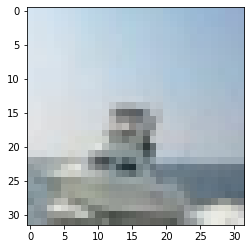

x_train[100]:
 [[[213 229 242]
  [211 227 240]
  [211 227 240]
  [208 226 240]
  [204 223 238]
  [202 221 236]
  [200 219 234]
  [195 218 234]
  [190 216 233]
  [187 213 230]
  [185 211 228]
  [183 209 227]
  [181 207 227]
  [176 204 223]
  [172 204 222]
  [170 203 220]
  [171 201 219]
  [170 199 217]
  [169 198 216]
  [168 197 215]
  [162 193 217]
  [159 191 216]
  [158 190 215]
  [155 187 212]
  [154 186 213]
  [153 184 213]
  [151 182 211]
  [151 182 211]
  [150 179 209]
  [151 174 206]
  [151 174 206]
  [149 172 204]]

 [[214 229 241]
  [212 227 239]
  [212 227 239]
  [209 226 240]
  [205 224 238]
  [204 222 237]
  [201 220 234]
  [197 219 234]
  [191 217 233]
  [188 214 230]
  [186 213 228]
  [185 210 228]
  [183 207 227]
  [178 205 224]
  [175 206 224]
  [173 204 222]
  [174 202 221]
  [172 200 219]
  [171 199 218]
  [169 197 216]
  [165 195 218]
  [162 193 217]
  [160 191 215]
  [156 187 212]
  [155 186 212]
  [156 186 215]
  [152 182 211]
  [151 181 210]
  [150 178 208]
  [152 

In [ ]:
# p24_cifar10_datasets.py

import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

np.set_printoptions(threshold=np.inf)

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 可视化训练集输入特征的第一个元素
plt.imshow(x_train[100])  # 绘制图片
plt.show()

# 打印出训练集输入特征的第一个元素
print("x_train[100]:\n", x_train[100])  # 是一个32行32列3通道的三维数组, 第101张图片的32行32列个像素点的RGB(3维)值
# 打印出训练集标签的第一个元素
print("y_train[100]:\n", y_train[100])

# 打印出整个训练集输入特征形状
print("x_train.shape:\n", x_train.shape)
# 打印出整个训练集标签的形状
print("y_train.shape:\n", y_train.shape)
# 打印出整个测试集输入特征的形状
print("x_test.shape:\n", x_test.shape)
# 打印出整个测试集标签的形状
print("y_test.shape:\n", y_test.shape)

## 5.10 卷积神经网络搭建示例
- 共**3**层神经网络
  - **1层卷积**
    - C(核:6*5*5，步长:1，填充:same ) 
    - B(Yes)
    - A(relu) 
    - P(max，核:2*2，步长:2，填充:same) 
    - D(0.2)
  - **2层全连接**
    - Flatten 
    - Dense(神经元:128，激活:relu，Dropout:0.2) 
    - Dense(神经元:10，激活:softmax)

Epoch 1/5
1563/1563 [==============================] - 68s 44ms/step - loss: 1.6626 - sparse_categorical_accuracy: 0.4029 - val_loss: 1.4873 - val_sparse_categorical_accuracy: 0.4773
Epoch 2/5
1563/1563 [==============================] - 68s 44ms/step - loss: 1.4172 - sparse_categorical_accuracy: 0.4920 - val_loss: 1.2953 - val_sparse_categorical_accuracy: 0.5377
Epoch 3/5
1563/1563 [==============================] - 68s 44ms/step - loss: 1.3180 - sparse_categorical_accuracy: 0.5286 - val_loss: 1.3899 - val_sparse_categorical_accuracy: 0.5189
Epoch 4/5
1563/1563 [==============================] - 68s 44ms/step - loss: 1.2613 - sparse_categorical_accuracy: 0.5512 - val_loss: 1.2184 - val_sparse_categorical_accuracy: 0.5666
Epoch 5/5
1563/1563 [==============================] - 68s 44ms/step - loss: 1.2212 - sparse_categorical_accuracy: 0.5679 - val_loss: 1.1871 - val_sparse_categorical_accuracy: 0.5779
Model: "baseline"
_________________________________________________________________
L

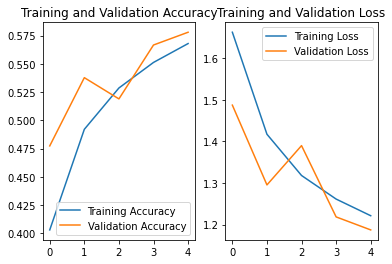

In [ ]:
# p27_cifar10_baseline.py
# it run around 6mins

import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

np.set_printoptions(threshold=np.inf)

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


# -----------------------MyModel-------------------------------------------
class Baseline(Model):
    def __init__(self):
        super(Baseline, self).__init__()
        self.c1 = Conv2D(filters=6, kernel_size=(5, 5), padding='same')  # 卷积层
        self.b1 = BatchNormalization()  # BN层
        self.a1 = Activation('relu')  # 激活层
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')  # 池化层
        self.d1 = Dropout(0.2)  # dropout层

        self.flatten = Flatten()
        self.f1 = Dense(128, activation='relu')
        self.d2 = Dropout(0.2)
        self.f2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)
        x = self.d1(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.d2(x)
        y = self.f2(x)
        return y


model = Baseline()
# -----------------------MyModel-------------------------------------------


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/Baseline.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

# print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## 5.11 LeNet
- Yann LeCun于1998年提出
- 那年没有BN, 没有Dropout
- 激活函数只有Sigmoid
- 卷积网络的开篇之作
- **共享卷积核**，减少了网络的参数
- 共**5**层网络
  - **2**层卷积计算层
  - **3**层全连接计算层

Epoch 1/5
1563/1563 [==============================] - 44s 28ms/step - loss: 2.0447 - sparse_categorical_accuracy: 0.2338 - val_loss: 1.8348 - val_sparse_categorical_accuracy: 0.3385
Epoch 2/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.7120 - sparse_categorical_accuracy: 0.3747 - val_loss: 1.6245 - val_sparse_categorical_accuracy: 0.3980
Epoch 3/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.5780 - sparse_categorical_accuracy: 0.4235 - val_loss: 1.5214 - val_sparse_categorical_accuracy: 0.4457
Epoch 4/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.4984 - sparse_categorical_accuracy: 0.4536 - val_loss: 1.5022 - val_sparse_categorical_accuracy: 0.4559
Epoch 5/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.4489 - sparse_categorical_accuracy: 0.4738 - val_loss: 1.4133 - val_sparse_categorical_accuracy: 0.4806
Model: "le_net5"
_________________________________________________________________
La

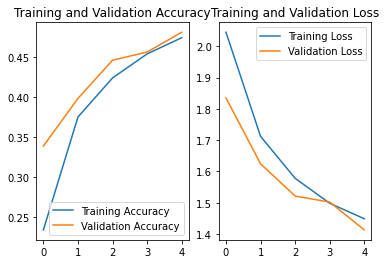

In [ ]:
# p31_cifar10_lenet5.py
# it run around 4mins

import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

np.set_printoptions(threshold=np.inf)

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# -----------------------LeNetModel-------------------------------------------
class LeNet5(Model):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.c1 = Conv2D(filters=6, kernel_size=(5, 5),
                         activation='sigmoid')
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2)

        self.c2 = Conv2D(filters=16, kernel_size=(5, 5),
                         activation='sigmoid')
        self.p2 = MaxPool2D(pool_size=(2, 2), strides=2)

        self.flatten = Flatten()
        self.f1 = Dense(120, activation='sigmoid')
        self.f2 = Dense(84, activation='sigmoid')
        self.f3 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.p1(x)

        x = self.c2(x)
        x = self.p2(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.f2(x)
        y = self.f3(x)
        return y


model = LeNet5()
# -----------------------LeNetModel-------------------------------------------

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/LeNet5.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

# print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## 5.12 AlexNet
- 诞生于2012年，当年ImageNet竞赛的冠军，Top5错误率为16.4%
- 用到了**LRN**(local response normalization局部响应标准化, 非现如今的主流BN方法)
- relu激活函数
- Dropout缓解过拟合
- 共**8**层网络
  - **5**层卷积层
  - **3**层全连接层

Epoch 1/5
1563/1563 [==============================] - 1129s 722ms/step - loss: 1.6109 - sparse_categorical_accuracy: 0.4105 - val_loss: 1.7825 - val_sparse_categorical_accuracy: 0.4036
Epoch 2/5
1563/1563 [==============================] - 1136s 727ms/step - loss: 1.2890 - sparse_categorical_accuracy: 0.5426 - val_loss: 1.2810 - val_sparse_categorical_accuracy: 0.5524
Epoch 3/5
1563/1563 [==============================] - 1137s 728ms/step - loss: 1.1617 - sparse_categorical_accuracy: 0.5926 - val_loss: 1.8483 - val_sparse_categorical_accuracy: 0.4243
Epoch 4/5
1563/1563 [==============================] - 1133s 725ms/step - loss: 1.0778 - sparse_categorical_accuracy: 0.6258 - val_loss: 1.2217 - val_sparse_categorical_accuracy: 0.5895
Epoch 5/5
1563/1563 [==============================] - 1135s 726ms/step - loss: 1.0263 - sparse_categorical_accuracy: 0.6459 - val_loss: 1.1159 - val_sparse_categorical_accuracy: 0.6102
Model: "alex_net8"
___________________________________________________

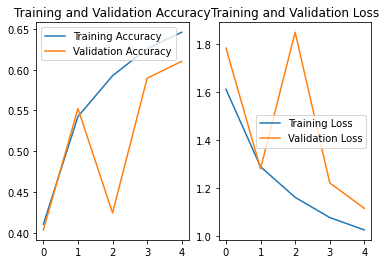

In [ ]:
# p34_cifar10_alexnet8.py
# it run around 90mins

import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

np.set_printoptions(threshold=np.inf)

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# -----------------------AlexNetModel-------------------------------------------
class AlexNet8(Model):
    def __init__(self):
        super(AlexNet8, self).__init__()
        self.c1 = Conv2D(filters=96, kernel_size=(3, 3))
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')
        self.p1 = MaxPool2D(pool_size=(3, 3), strides=2)

        self.c2 = Conv2D(filters=256, kernel_size=(3, 3))
        self.b2 = BatchNormalization()
        self.a2 = Activation('relu')
        self.p2 = MaxPool2D(pool_size=(3, 3), strides=2)

        self.c3 = Conv2D(filters=384, kernel_size=(3, 3), padding='same',
                         activation='relu')
                         
        self.c4 = Conv2D(filters=384, kernel_size=(3, 3), padding='same',
                         activation='relu')
                         
        self.c5 = Conv2D(filters=256, kernel_size=(3, 3), padding='same',
                         activation='relu')
        self.p3 = MaxPool2D(pool_size=(3, 3), strides=2)

        self.flatten = Flatten()
        self.f1 = Dense(2048, activation='relu')
        self.d1 = Dropout(0.5)
        self.f2 = Dense(2048, activation='relu')
        self.d2 = Dropout(0.5)
        self.f3 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)

        x = self.c2(x)
        x = self.b2(x)
        x = self.a2(x)
        x = self.p2(x)

        x = self.c3(x)

        x = self.c4(x)

        x = self.c5(x)
        x = self.p3(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.d1(x)
        x = self.f2(x)
        x = self.d2(x)
        y = self.f3(x)
        return y


model = AlexNet8()
# -----------------------AlexNetModel-------------------------------------------

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/AlexNet8.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

# print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## 5.13 VGGNet
- 诞生于2014年，当年ImageNet竞赛的亚军，Top5错误率减小到7.3%
- **小尺寸**卷积核
- 网络结构规整, 适合硬件加速
- **16**层网络
  - **13**层卷积(`CBA` `CBAPD` `CBA` `CBAPD` `CBA` `CBA` `CBAPD` `CBA` `CBA` `CBAPD` `CBA` `CBAPD` `CBAPD`)
  - **3**层全连接

170500096/170498071 [==============================] - 4s 0us/step
Epoch 1/5
1563/1563 [==============================] - 5292s 3s/step - loss: 1.9056 - sparse_categorical_accuracy: 0.2333 - val_loss: 2.1976 - val_sparse_categorical_accuracy: 0.2675
Epoch 2/5
1563/1563 [==============================] - 5210s 3s/step - loss: 1.5211 - sparse_categorical_accuracy: 0.4077 - val_loss: 1.5276 - val_sparse_categorical_accuracy: 0.4349
Epoch 3/5
1563/1563 [==============================] - 5173s 3s/step - loss: 1.2145 - sparse_categorical_accuracy: 0.5559 - val_loss: 1.2863 - val_sparse_categorical_accuracy: 0.5626
Epoch 4/5
1563/1563 [==============================] - 5280s 3s/step - loss: 1.0149 - sparse_categorical_accuracy: 0.6498 - val_loss: 1.1669 - val_sparse_categorical_accuracy: 0.6091
Epoch 5/5
1563/1563 [==============================] - 5231s 3s/step - loss: 0.8748 - sparse_categorical_accuracy: 0.7073 - val_loss: 0.8638 - val_sparse_categorical_accuracy: 0.7005
Model: "vg_g16"
__

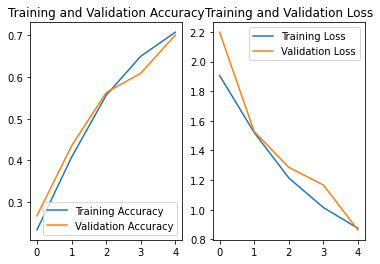

In [ ]:
# p36_cifar10_vgg16.py
# it run around 8hrs 
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

np.set_printoptions(threshold=np.inf)

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


# -----------------------VGGNetModel-------------------------------------------
class VGG16(Model):
    def __init__(self):
        super(VGG16, self).__init__()
        self.c1 = Conv2D(filters=64, kernel_size=(3, 3), padding='same')  # 卷积层1
        self.b1 = BatchNormalization()  # BN层1
        self.a1 = Activation('relu')  # 激活层1
        self.c2 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', )
        self.b2 = BatchNormalization()  # BN层1
        self.a2 = Activation('relu')  # 激活层1
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d1 = Dropout(0.2)  # dropout层

        self.c3 = Conv2D(filters=128, kernel_size=(3, 3), padding='same')
        self.b3 = BatchNormalization()  # BN层1
        self.a3 = Activation('relu')  # 激活层1
        self.c4 = Conv2D(filters=128, kernel_size=(3, 3), padding='same')
        self.b4 = BatchNormalization()  # BN层1
        self.a4 = Activation('relu')  # 激活层1
        self.p2 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d2 = Dropout(0.2)  # dropout层

        self.c5 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b5 = BatchNormalization()  # BN层1
        self.a5 = Activation('relu')  # 激活层1
        self.c6 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b6 = BatchNormalization()  # BN层1
        self.a6 = Activation('relu')  # 激活层1
        self.c7 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b7 = BatchNormalization()
        self.a7 = Activation('relu')
        self.p3 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d3 = Dropout(0.2)

        self.c8 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b8 = BatchNormalization()  # BN层1
        self.a8 = Activation('relu')  # 激活层1
        self.c9 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b9 = BatchNormalization()  # BN层1
        self.a9 = Activation('relu')  # 激活层1
        self.c10 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b10 = BatchNormalization()
        self.a10 = Activation('relu')
        self.p4 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d4 = Dropout(0.2)

        self.c11 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b11 = BatchNormalization()  # BN层1
        self.a11 = Activation('relu')  # 激活层1
        self.c12 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b12 = BatchNormalization()  # BN层1
        self.a12 = Activation('relu')  # 激活层1
        self.c13 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b13 = BatchNormalization()
        self.a13 = Activation('relu')
        self.p5 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d5 = Dropout(0.2)

        self.flatten = Flatten()
        self.f1 = Dense(512, activation='relu')
        self.d6 = Dropout(0.2)
        self.f2 = Dense(512, activation='relu')
        self.d7 = Dropout(0.2)
        self.f3 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.c2(x)
        x = self.b2(x)
        x = self.a2(x)
        x = self.p1(x)
        x = self.d1(x)

        x = self.c3(x)
        x = self.b3(x)
        x = self.a3(x)
        x = self.c4(x)
        x = self.b4(x)
        x = self.a4(x)
        x = self.p2(x)
        x = self.d2(x)

        x = self.c5(x)
        x = self.b5(x)
        x = self.a5(x)
        x = self.c6(x)
        x = self.b6(x)
        x = self.a6(x)
        x = self.c7(x)
        x = self.b7(x)
        x = self.a7(x)
        x = self.p3(x)
        x = self.d3(x)

        x = self.c8(x)
        x = self.b8(x)
        x = self.a8(x)
        x = self.c9(x)
        x = self.b9(x)
        x = self.a9(x)
        x = self.c10(x)
        x = self.b10(x)
        x = self.a10(x)
        x = self.p4(x)
        x = self.d4(x)

        x = self.c11(x)
        x = self.b11(x)
        x = self.a11(x)
        x = self.c12(x)
        x = self.b12(x)
        x = self.a12(x)
        x = self.c13(x)
        x = self.b13(x)
        x = self.a13(x)
        x = self.p5(x)
        x = self.d5(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.d6(x)
        x = self.f2(x)
        x = self.d7(x)
        y = self.f3(x)
        return y


model = VGG16()
# -----------------------VGGNetModel-------------------------------------------

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/VGG16.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

# print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## 5.14 InceptionNet
- 诞生于2014年，当年ImageNet竞赛冠军，Top5错误率为6.67%
- Inception结构块为基本单元
  - 包含4分支, 分别由
    - `1*1`卷积核输出到卷积连接器;
    - `1*1`卷积核配合`3*3`卷积核输出到卷积连接器;
    - `1*1`卷积核配合`5*5`卷积核输出到卷积连接器;
    - `3*3`最大池化核配合`1*1`卷积核输出到卷积连接器;
  - 卷积连接器将4分支特征数据按照深度方向拼接，作为输出
  - 在同一层网络内使用多个不同尺寸的卷积核, 提取不同尺寸的特征
  - 通过设定1*1卷积核的个数,减少了输出特征图的深度,达到降维作用
  - 减少参数量和计算量
- 使用BN缓解梯度消失

170500096/170498071 [==============================] - 2s 0us/step
Epoch 1/5
49/49 [==============================] - 289s 6s/step - loss: 2.0816 - sparse_categorical_accuracy: 0.2269 - val_loss: 1.8789 - val_sparse_categorical_accuracy: 0.3126
Epoch 2/5
49/49 [==============================] - 290s 6s/step - loss: 1.7959 - sparse_categorical_accuracy: 0.3280 - val_loss: 1.6824 - val_sparse_categorical_accuracy: 0.3798
Epoch 3/5
49/49 [==============================] - 290s 6s/step - loss: 1.6546 - sparse_categorical_accuracy: 0.3831 - val_loss: 1.6086 - val_sparse_categorical_accuracy: 0.4090
Epoch 4/5
49/49 [==============================] - 290s 6s/step - loss: 1.5925 - sparse_categorical_accuracy: 0.4141 - val_loss: 1.5434 - val_sparse_categorical_accuracy: 0.4309
Epoch 5/5
49/49 [==============================] - 291s 6s/step - loss: 1.5077 - sparse_categorical_accuracy: 0.4464 - val_loss: 1.4609 - val_sparse_categorical_accuracy: 0.4595
Model: "inception10"
______________________

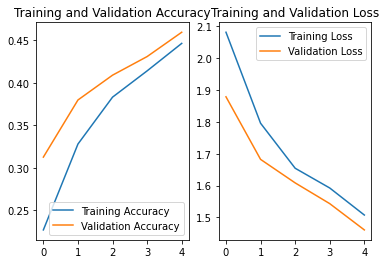

In [ ]:
# p40_cifar10_inception10.py

import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense, \
    GlobalAveragePooling2D
from tensorflow.keras import Model

np.set_printoptions(threshold=np.inf)

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


# -----------------------InceptionNetModel--------------------------------------

# class ConvBNRelu()增加代码可读性: 4分支均包括CBA过程
class ConvBNRelu(Model):
    def __init__(self, ch, kernelsz=3, strides=1, padding='same'):
        super(ConvBNRelu, self).__init__()
        self.model = tf.keras.models.Sequential([
            Conv2D(ch, kernelsz, strides=strides, padding=padding),
            BatchNormalization(),
            Activation('relu')
        ])

    def call(self, x):
        x = self.model(x, training=False) #在training=False时，BN通过整个训练集计算均值、方差去做批归一化，training=True时，通过当前batch的均值、方差去做批归一化。推理时 training=False效果好
        return x

# class InceptionBlk()模块/结构块,均包括4分支: c1分支; c2_1, c2_2分支; c3_1, c3_2分支; p4_1, c4_2分支
class InceptionBlk(Model):
    def __init__(self, ch1, strides=1):
        super(InceptionBlk, self).__init__()
        self.ch = ch1
        self.strides = strides
        self.c1 = ConvBNRelu(ch1, kernelsz=1, strides=strides)
        self.c2_1 = ConvBNRelu(ch1, kernelsz=1, strides=strides)
        self.c2_2 = ConvBNRelu(ch1, kernelsz=3, strides=1)
        self.c3_1 = ConvBNRelu(ch1, kernelsz=1, strides=strides)
        self.c3_2 = ConvBNRelu(ch1, kernelsz=5, strides=1)
        self.p4_1 = MaxPool2D(3, strides=1, padding='same')
        self.c4_2 = ConvBNRelu(ch1, kernelsz=1, strides=strides)

    def call(self, x):
        x1 = self.c1(x)
        x2_1 = self.c2_1(x)
        x2_2 = self.c2_2(x2_1)
        x3_1 = self.c3_1(x)
        x3_2 = self.c3_2(x3_1)
        x4_1 = self.p4_1(x)
        x4_2 = self.c4_2(x4_1)
        # concat along axis=channel
        x = tf.concat([x1, x2_2, x3_2, x4_2], axis=3)   # 将4分支叠加在一起
        return x

# class Inception10(Model)包括10层网络
class Inception10(Model):
    def __init__(self, num_blocks, num_classes, init_ch=16, **kwargs):
        super(Inception10, self).__init__(**kwargs)
        self.in_channels = init_ch
        self.out_channels = init_ch
        self.num_blocks = num_blocks
        self.init_ch = init_ch
        self.c1 = ConvBNRelu(init_ch)
        self.blocks = tf.keras.models.Sequential()
        for block_id in range(num_blocks):
            for layer_id in range(2):
                if layer_id == 0:
                    block = InceptionBlk(self.out_channels, strides=2)
                else:
                    block = InceptionBlk(self.out_channels, strides=1)
                self.blocks.add(block)
            # enlarger out_channels per block
            self.out_channels *= 2
        self.p1 = GlobalAveragePooling2D()
        self.f1 = Dense(num_classes, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.blocks(x)
        x = self.p1(x)
        y = self.f1(x)
        return y


model = Inception10(num_blocks=2, num_classes=10)
# -----------------------InceptionNetModel--------------------------------------


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/Inception10.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=1024, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

# print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
help(tf.keras.Model)

Help on class Model in module tensorflow.python.keras.engine.training:

class Model(tensorflow.python.keras.engine.base_layer.Layer, tensorflow.python.keras.utils.version_utils.ModelVersionSelector)
 |  `Model` groups layers into an object with training and inference features.
 |  
 |  Arguments:
 |      inputs: The input(s) of the model: a `keras.Input` object or list of
 |          `keras.Input` objects.
 |      outputs: The output(s) of the model. See Functional API example below.
 |      name: String, the name of the model.
 |  
 |  There are two ways to instantiate a `Model`:
 |  
 |  1 - With the "Functional API", where you start from `Input`,
 |  you chain layer calls to specify the model's forward pass,
 |  and finally you create your model from inputs and outputs:
 |  
 |  ```python
 |  import tensorflow as tf
 |  
 |  inputs = tf.keras.Input(shape=(3,))
 |  x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
 |  outputs = tf.keras.layers.Dense(5, activation=tf.nn.soft

## 5.15 ResNet
- 诞生于2015年，当年ImageNet竞赛冠军，Top5错误率为3.57%
- 提出了层间残差跳连, 引入了前方信息,防止前边特征丢失, 使得可以增加神经网络层数
- 跳连线
  - 将前边特征直接接到后边
  - 使得神经网络可以更深发展
  - 两路特征图对应元素值相加
    - 虚线表示不同维度:H(x)=F(x)+W(x), W是1*1卷积操作，调整x的维度
    - 实线表示相同维度:H(x)=F(x)+x, 做矩阵相加

In [ ]:
# p46_cifar10_resnet18.py
# batch_size=128, default = 32
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

np.set_printoptions(threshold=np.inf)

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


# -----------------------ResNetModel-------------------------------------
class ResnetBlock(Model):

    def __init__(self, filters, strides=1, residual_path=False):
        super(ResnetBlock, self).__init__()
        self.filters = filters
        self.strides = strides
        self.residual_path = residual_path

        self.c1 = Conv2D(filters, (3, 3), strides=strides, padding='same', use_bias=False)
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')

        self.c2 = Conv2D(filters, (3, 3), strides=1, padding='same', use_bias=False)
        self.b2 = BatchNormalization()

        # residual_path为True时，对输入进行下采样，即用1x1的卷积核做卷积操作，保证x能和F(x)维度相同，顺利相加
        if residual_path:
            self.down_c1 = Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)
            self.down_b1 = BatchNormalization()
        
        self.a2 = Activation('relu')

    def call(self, inputs):
        residual = inputs  # residual等于输入值本身，即residual=x
        # 将输入通过卷积、BN层、激活层，计算F(x)
        x = self.c1(inputs)
        x = self.b1(x)
        x = self.a1(x)

        x = self.c2(x)
        y = self.b2(x)

        if self.residual_path:
            residual = self.down_c1(inputs)
            residual = self.down_b1(residual)

        out = self.a2(y + residual)  # 最后输出的是两部分的和，即F(x)+x或F(x)+Wx,再过激活函数
        return out


class ResNet18(Model):

    def __init__(self, block_list, initial_filters=64):  # block_list表示每个block有几个卷积层
        super(ResNet18, self).__init__()
        self.num_blocks = len(block_list)  # 共有几个block
        self.block_list = block_list
        self.out_filters = initial_filters
        #-------第一层网络: 64个3*3卷积核------------------
        self.c1 = Conv2D(self.out_filters, (3, 3), strides=1, padding='same', use_bias=False)
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')
        #-------第一层网络: 64个3*3卷积核------------------

        self.blocks = tf.keras.models.Sequential()
        # 构建ResNet网络结构:4个ResNet块
        for block_id in range(len(block_list)):  # 第几个resnet block
            for layer_id in range(block_list[block_id]):  # 第几个卷积层

                if block_id != 0 and layer_id == 0:  # 对除第一个block以外的每个block的输入进行下采样
                    block = ResnetBlock(self.out_filters, strides=2, residual_path=True)   # 虚线连接部分
                else:
                    block = ResnetBlock(self.out_filters, residual_path=False)    # 实线连接部分
                self.blocks.add(block)  # 将构建好的block加入resnet
            self.out_filters *= 2  # 下一个block的卷积核数是上一个block的2倍
        
        #------------------------------池化-------------------------------------   
        self.p1 = tf.keras.layers.GlobalAveragePooling2D()

        #------------------------------第18层全连接网络---------------------------
        self.f1 = tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2())
        #------------------------------第18层全连接网络---------------------------

    def call(self, inputs):
        x = self.c1(inputs)
        x = self.b1(x)
        x = self.a1(x)
        x = self.blocks(x)
        x = self.p1(x)
        y = self.f1(x)
        return y


model = ResNet18([2, 2, 2, 2])
# -----------------------ResNetModel-------------------------------------


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/ResNet18.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

# print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

170500096/170498071 [==============================] - 11s 0us/step
Epoch 1/5
391/391 [==============================] - 4531s 12s/step - loss: 1.4154 - sparse_categorical_accuracy: 0.5484 - val_loss: 1.7874 - val_sparse_categorical_accuracy: 0.4818
Epoch 2/5
391/391 [==============================] - 4555s 12s/step - loss: 0.8431 - sparse_categorical_accuracy: 0.7369 - val_loss: 1.2540 - val_sparse_categorical_accuracy: 0.6358
Epoch 3/5
391/391 [==============================] - 4540s 12s/step - loss: 0.6076 - sparse_categorical_accuracy: 0.8072 - val_loss: 1.2444 - val_sparse_categorical_accuracy: 0.6506
Epoch 4/5
391/391 [==============================] - 4531s 12s/step - loss: 0.4669 - sparse_categorical_accuracy: 0.8510 - val_loss: 0.9594 - val_sparse_categorical_accuracy: 0.7175
Epoch 5/5
224/391 [================>.............] - ETA: 30:56 - loss: 0.3466 - sparse_categorical_accuracy: 0.8903

## 5.16 经典卷积网络小结
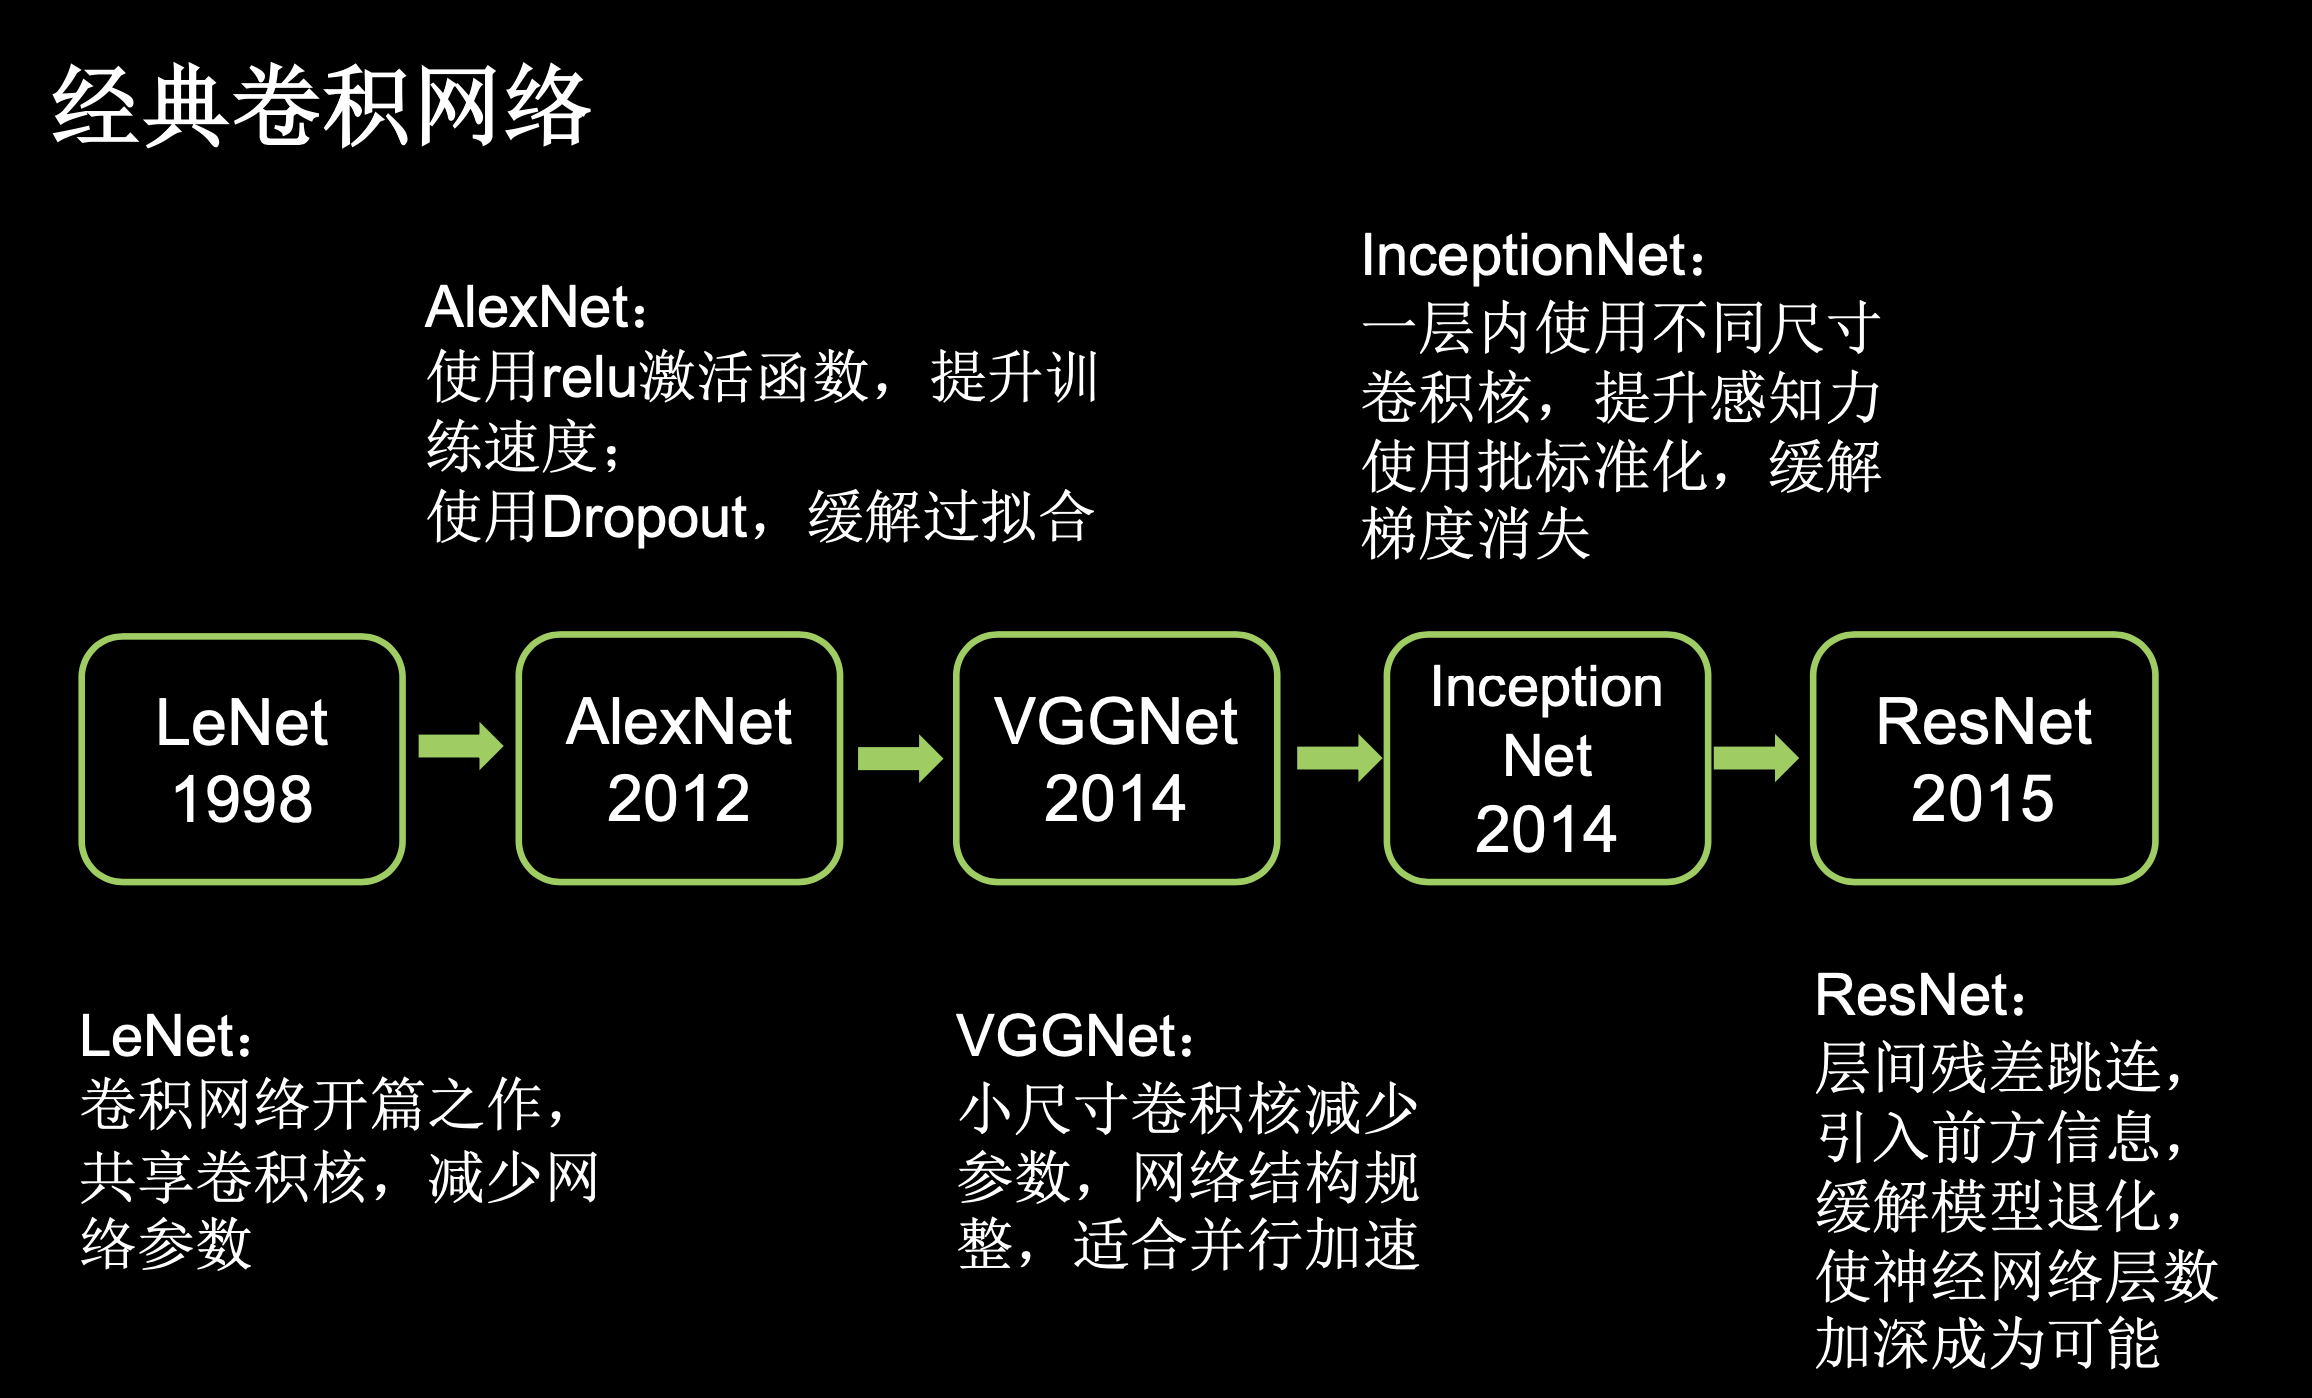